In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# 1.DataFrame添加新的行

In [2]:
#读取names数据集
names = pd.read_csv('data/names.csv')
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2


In [3]:
#用loc直接赋值新的行
new_data_list = ['Aria',1]
names.loc[4] = new_data_list
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


In [4]:
#用loc的标签直接赋值新的行
names.loc['five'] = ['Zach',3]
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3


In [5]:
#也可以用字典赋值新行
names.loc[len(names)] = {'Name':'Zayd','Age':2}
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3
6,Zayd,2


In [6]:
#字典可以打乱列名的顺序
names.loc[len(names)] = pd.Series({'Age':32,'Name':'Dean'})
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3
6,Zayd,2
7,Dean,32


In [7]:
#直接append一个字典
names = pd.read_csv('data/names.csv')
names.append({'Name':'Aria','Age':1})

TypeError: Can only append a Series if ignore_index=True or if the Series has a name

In [8]:
#按照错误提示，加上ignore_index=True
names.append({'Name':'Aria','Age':1},ignore_index=True)

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


In [9]:
#设定行索引
names.index = ['Canada','Canada','USA','USA']
names

,Name,Age
Canada,Cornelia,70
Canada,Abbas,69
USA,Penelope,4
USA,Niko,2


In [10]:
#添加一行
names.append({'Name':'Aria','Age':1},ignore_index=True)

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


In [11]:
#创建一个Series对象
s = pd.Series({'Name':'Zach','Age':3},name=len(names))
s

Name    Zach
Age        3
Name: 4, dtype: object

In [12]:
#append方法可以将DataFrame和Series相连
names.append(s)

,Name,Age
Canada,Cornelia,70
Canada,Abbas,69
USA,Penelope,4
USA,Niko,2
4,Zach,3


In [13]:
#append方法可以同时连接多行，只要将对象放到列表中
s1 = pd.Series({'Name':'Zach','Age':3},name=len(names))
s2 = pd.Series({'Name':'Zayd','Age':2},name='USA')
names.append([s1,s2])

,Name,Age
Canada,Cornelia,70
Canada,Abbas,69
USA,Penelope,4
USA,Niko,2
4,Zach,3
USA,Zayd,2


In [14]:
#读取baseball16数据集
bball_16 = pd.read_csv('data/baseball16.csv')
bball_16.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,altuvjo01,2016,1,HOU,AL,161,640,108,216,42,...,96.0,30.0,10.0,60,70.0,11.0,7.0,3.0,7.0,15.0
1,bregmal01,2016,1,HOU,AL,49,201,31,53,13,...,34.0,2.0,0.0,15,52.0,0.0,0.0,0.0,1.0,1.0
2,castrja01,2016,1,HOU,AL,113,329,41,69,16,...,32.0,2.0,1.0,45,123.0,0.0,1.0,1.0,0.0,9.0
3,correca01,2016,1,HOU,AL,153,577,76,158,36,...,96.0,13.0,3.0,75,139.0,5.0,5.0,0.0,3.0,12.0
4,gattiev01,2016,1,HOU,AL,128,447,58,112,19,...,72.0,2.0,1.0,43,127.0,6.0,4.0,0.0,5.0,12.0


In [15]:
#选取一行，并将其转换为字典
data_dict = bball_16.iloc[0].to_dict()
data_dict

{'2B': 42,
 '3B': 5,
 'AB': 640,
 'BB': 60,
 'CS': 10.0,
 'G': 161,
 'GIDP': 15.0,
 'H': 216,
 'HBP': 7.0,
 'HR': 24,
 'IBB': 11.0,
 'R': 108,
 'RBI': 96.0,
 'SB': 30.0,
 'SF': 7.0,
 'SH': 3.0,
 'SO': 70.0,
 'lgID': 'AL',
 'playerID': 'altuvjo01',
 'stint': 1,
 'teamID': 'HOU',
 'yearID': 2016}

In [16]:
#对这个字典做格式处理，如果是字符串则为空，否则为缺失值
new_data_dict = {k:'' if isinstance(v,str) else np.nan for k,v in data_dict.items()}
new_data_dict

{'2B': nan,
 '3B': nan,
 'AB': nan,
 'BB': nan,
 'CS': nan,
 'G': nan,
 'GIDP': nan,
 'H': nan,
 'HBP': nan,
 'HR': nan,
 'IBB': nan,
 'R': nan,
 'RBI': nan,
 'SB': nan,
 'SF': nan,
 'SH': nan,
 'SO': nan,
 'lgID': '',
 'playerID': '',
 'stint': nan,
 'teamID': '',
 'yearID': nan}

In [17]:
#将一行数据添加到DataFrame是非常消耗资源的，不能通过循环的方法来做
#下面是创建一千行的新数据，用作Series的列表
random_data = []
for i in range(1000):
    d = dict()
    for k, v in data_dict.items():
        if isinstance(v,str):
            d[k] = np.random.choice(list('abcde'))
        else:
            d[k] = np.random.randint(10)
    random_data.append(pd.Series(d,name=i+len(bball_16)))
random_data[0].head()

playerID    c
yearID      4
stint       9
teamID      c
lgID        a
Name: 16, dtype: object

In [18]:
%%timeit
#给上面的append操作计时，1000行的数据用了5s
bball_16_copy = bball_16.copy()
for row in random_data:
    bball_16_copy = bball_16_copy.append(row)

1 loop, best of 3: 4.24 s per loop


In [19]:
%%timeit
#如果是通过列表的方式append，可以大大节省时间
bball_16_copy = bball_16.copy()
bball_16_copy = bball_16_copy.append(random_data)

10 loops, best of 3: 78.4 ms per loop


# 2.连接多个DataFrame

In [20]:
#读取stocks_2016和stocks_2017两个数据集，用Symbol作为行索引名
stocks_2016 = pd.read_csv('data/stocks_2016.csv',index_col='Symbol')
stocks_2017 = pd.read_csv('data/stocks_2017.csv',index_col='Symbol')
stocks_2016

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [21]:
stocks_2017

,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [22]:
#将两个DataFrame放到一个列表中，用pandas的concat方法将它们连接起来
s_list = [stocks_2016,stocks_2017]
pd.concat(s_list)

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [23]:
#keys参数可以给两个DataFrame命名，该标签会出现在行索引的最外层；
#会生成多层索引，names参数可以重命名每个索引层
pd.concat(s_list,keys=['2016','2017'],names=['Year','Symbol'])

Shares  Low  High
Year Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40
     IBM         87   75    95
     SLB         20   55    85
     TXN        500   15    23
     TSLA       100  100   300

In [24]:
#也可以横向连接，只要将axis参数设为columns或1
pd.concat(s_list,keys=['2016','2017'],axis='columns',names=['Year',None],sort=True)

Year   2016                2017              
     Shares   Low   High Shares    Low   High
AAPL   80.0  95.0  110.0   50.0  120.0  140.0
GE      NaN   NaN    NaN  100.0   30.0   40.0
IBM     NaN   NaN    NaN   87.0   75.0   95.0
SLB     NaN   NaN    NaN   20.0   55.0   85.0
TSLA   50.0  80.0  130.0  100.0  100.0  300.0
TXN     NaN   NaN    NaN  500.0   15.0   23.0
WMT    40.0  55.0   70.0    NaN    NaN    NaN

In [25]:
#concat函数默认使用的是外连接，会保留每个DataFrame中的所有行。
#也可以通过设定join函数，使用内连接
pd.concat(s_list,join='inner',keys=['2016','2017'],axis='columns',names=['Year',None],sort=True)

Year     2016            2017          
       Shares Low High Shares  Low High
Symbol                                 
AAPL       80  95  110     50  120  140
TSLA       50  80  130    100  100  300

In [26]:
#append是concat方法的超简化版本，append内部其实就是调用concat。
#本节的第二个例子，pd.concat也可以如下实现：
stocks_2016.append(stocks_2017)

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


# 3.比较特朗普和奥巴马的支持率

In [27]:
#pandas的read_html函数可以从网页抓取表格数据
#数据现在无法用read_html获取，故下载导入
trump = pd.read_csv('data/45.csv',parse_dates=['Start Date','End Date'])
trump.head()

,President,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,Donald Trump,2018-10-08,2018-10-14,44,51,5
1,NaN,2018-10-01,2018-10-07,43,53,4
2,NaN,2018-09-24,2018-09-30,42,53,5
3,NaN,2018-09-17,2018-09-23,40,56,4
4,NaN,2018-09-10,2018-09-16,38,56,6


In [28]:
trump = trump.dropna(axis=1,how='all')
trump.head()

,President,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,Donald Trump,2018-10-08,2018-10-14,44,51,5
1,NaN,2018-10-01,2018-10-07,43,53,4
2,NaN,2018-09-24,2018-09-30,42,53,5
3,NaN,2018-09-17,2018-09-23,40,56,4
4,NaN,2018-09-10,2018-09-16,38,56,6


In [29]:
#统计各列的缺失值个数
trump.isnull().sum()

President        89
Start Date        0
End Date          0
Approving         0
Disapproving      0
Unsure/NoData     0
dtype: int64

In [30]:
#缺失值向前填充
trump = trump.ffill()
trump.head()

,President,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,Donald Trump,2018-10-08,2018-10-14,44,51,5
1,Donald Trump,2018-10-01,2018-10-07,43,53,4
2,Donald Trump,2018-09-24,2018-09-30,42,53,5
3,Donald Trump,2018-09-17,2018-09-23,40,56,4
4,Donald Trump,2018-09-10,2018-09-16,38,56,6


In [31]:
#确认数据类型
trump.dtypes

President                object
Start Date       datetime64[ns]
End Date         datetime64[ns]
Approving                 int64
Disapproving              int64
Unsure/NoData             int64
dtype: object

In [32]:
#将前面的步骤做成一个函数，用于获取多个总统的信息
def get_pres_appr(pres_num):
    pres = pd.read_csv('data/{}.csv'.format(pres_num))
    pres = pres.dropna(axis=1,how='all')
    pres['President'] = pres['President'].ffill()
    return pres.sort_values('End Date').reset_index(drop=True)
obama = get_pres_appr(44)
obama.head()

,President,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,Barak Obama,12/29/2009,01/02/2010,51,43,7
1,Barak Obama,12/28/2010,01/02/2011,50,42,8
2,Barak Obama,12/28/2011,01/02/2012,45,47,8
3,Barak Obama,12/28/2013,01/02/2014,42,50,8
4,Barak Obama,12/29/2014,01/02/2015,48,47,5


In [33]:
#获取最近五位总统的数据，输出每位的前三行数据
pres_41_45 = pd.concat([get_pres_appr(x) for x in range(41,46)],ignore_index=True)
pres_41_45.groupby('President').head(3)

,President,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,George Bush,01/03/1991,01/06/1991,58,30,10
1,George Bush,01/03/1992,01/06/1992,46,46,7
2,George Bush,01/04/1990,01/07/1990,79,10,9
158,William J. Clinton,01/03/1997,01/05/1997,57,34,7
159,William J. Clinton,01/06/1999,01/06/1999,63,34,3
160,William J. Clinton,01/05/1996,01/07/1996,42,49,8
386,George W. Bush,01/03/2003,01/05/2003,63,31,4
387,George W. Bush,01/02/2004,01/05/2004,60,35,4
388,George W. Bush,01/03/2005,01/05/2005,51,44,3
656,Barak Obama,12/29/2009,01/02/2010,51,43,7


In [34]:
#确认一下是否有一个日期对应多个支持率
pres_41_45['End Date'].value_counts().head(8)

05/22/1990    2
03/11/1990    2
11/22/1992    2
10/10/2013    2
02/09/1999    2
08/12/1990    2
08/26/1990    2
07/03/2015    1
Name: End Date, dtype: int64

In [35]:
#去除重复值
pres_41_45 = pres_41_45.drop_duplicates(subset='End Date')
pres_41_45.shape

(3526, 6)

In [36]:
#对数据做简单的统计
pres_41_45['President'].value_counts()

Barak Obama           2786
George W. Bush         270
William J. Clinton     227
George Bush            153
Donald Trump            90
Name: President, dtype: int64

In [37]:
pres_41_45.groupby('President',sort=False).median().round(1)

,Approving,Disapproving,Unsure/NoData
President,,,
George Bush,62.0,22.0,9.0
William J. Clinton,57.0,36.0,6.0
George W. Bush,50.5,45.5,4.0
Barak Obama,47.0,47.0,7.0
Donald Trump,39.0,56.0,5.0


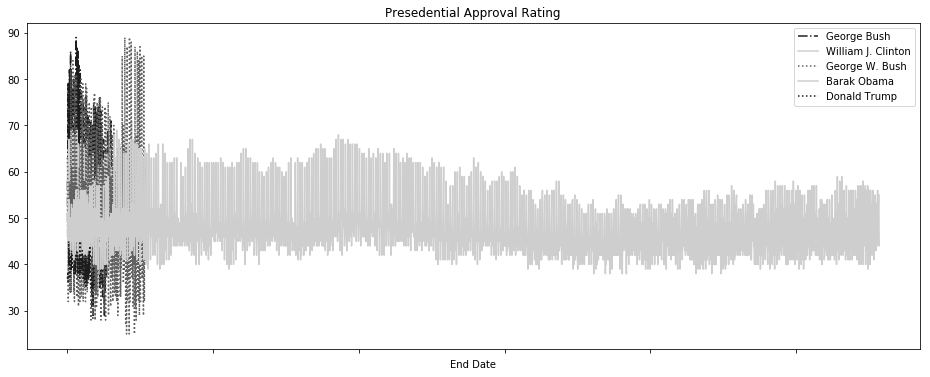

In [49]:
#画出每任总统的支持率变化
from matplotlib import cm
fig,ax = plt.subplots(figsize=(16,6))

styles = ['-.','-',':','-',':']
colors = [.9,.3,.7,.3,.9]
groups = pres_41_45.groupby('President',sort=False)

for style,color,(pres,df) in zip(styles,colors,groups):
    df.plot('End Date','Approving',ax=ax,label=pres,style=style,color=cm.Greys(color),
           title='Presedential Approval Rating')

In [60]:
#rolling average方法可以平滑曲线，在这个例子中，使用的是90天求平均，参数on指明了滚动窗口是从哪列计算的
pres_rm = pres_41_45.groupby('President',sort=False) \
                    .rolling(90,on='End Date')['Approving'] \
                    .mean()
pres_rm.head()

President    End Date  
George Bush  01/06/1991   NaN
             01/06/1992   NaN
             01/07/1990   NaN
             01/08/1990   NaN
             01/11/1991   NaN
Name: Approving, dtype: float64